In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import os
import itertools
import rasterio
from matplotlib import pyplot as plt
import geopandas as gpd
from rasterstats import zonal_stats
from tqdm import tqdm
import xarray as xr
from rasterstats import zonal_stats


In [17]:
plt.style.use('dark_background')

In [2]:
psi_dir = '/home/rgreen/DroughtEDM/Data/Prediction_skill_interval/ndvi/'
psed_dir = '/home/rgreen/DroughtEDM/Data/Prediction_skill_ed/'
psi_ed6_dir = '/home/rgreen/DroughtEDM/Data/Prediction_skill_interval/ndvi_ed6/'
ndvi_anom_psi_dir = '/home/rgreen/DroughtEDM/Data/Prediction_skill_interval/ndvi_anom/'
ndvi_anom_psed_dir = '/home/rgreen/DroughtEDM/Data/Prediction_skill_ed/ndvi_anom/'
ndvi_anom_psed_hh_dir = '/home/rgreen/DroughtEDM/Data/Prediction_skill_ed/ndvi_anom_hh/'

In [4]:
def simplex_mean(in_dir, lc):
    
    
    simplex_rasters = np.array(sorted(os.listdir(in_dir)))
    tifs = pd.Series(simplex_rasters).str.contains(lc)
    files = simplex_rasters[tifs]
    
    mean_simplex = []
    
    for filename in files:
            simplex_raster = rasterio.open(in_dir + filename)
            read_raster = simplex_raster.read(1)
            mean_raster = np.nanmean(read_raster)
            mean_simplex.append(mean_raster)
            
    return mean_simplex

In [5]:
psi_bo = simplex_mean(psi_dir, 'bo')
psi_ci = simplex_mean(psi_dir, 'ci')
psi_cr = simplex_mean(psi_dir, 'cr')
psi_gr = simplex_mean(psi_dir, 'gr')
psi_sh = simplex_mean(psi_dir, 'sh')

In [6]:
psi_bo_anom = simplex_mean(ndvi_anom_psi_dir, 'bo')
psi_ci_anom = simplex_mean(ndvi_anom_psi_dir, 'ci')
psi_cr_anom = simplex_mean(ndvi_anom_psi_dir, 'cr')
psi_gr_anom = simplex_mean(ndvi_anom_psi_dir, 'gr')
psi_sh_anom = simplex_mean(ndvi_anom_psi_dir, 'sh')

In [7]:
psed_bo = simplex_mean(psed_dir, 'bo')
psed_ci = simplex_mean(psed_dir, 'ci')
psed_cr = simplex_mean(psed_dir, 'cr')
psed_gr = simplex_mean(psed_dir, 'gr')
psed_sh = simplex_mean(psed_dir, 'sh')

In [8]:
psed_bo_anom = simplex_mean(ndvi_anom_psed_dir, 'bo')
psed_ci_anom = simplex_mean(ndvi_anom_psed_dir, 'ci')
psed_cr_anom = simplex_mean(ndvi_anom_psed_dir, 'cr')
psed_gr_anom = simplex_mean(ndvi_anom_psed_dir, 'gr')
psed_sh_anom = simplex_mean(ndvi_anom_psed_dir, 'sh')

In [9]:
psed_bo_anom_hh = simplex_mean(ndvi_anom_psed_hh_dir, 'bo')
psed_ci_anom_hh = simplex_mean(ndvi_anom_psed_hh_dir, 'ci')
psed_cr_anom_hh = simplex_mean(ndvi_anom_psed_hh_dir, 'cr')
psed_gr_anom_hh = simplex_mean(ndvi_anom_psed_hh_dir, 'gr')
psed_sh_anom_hh = simplex_mean(ndvi_anom_psed_hh_dir, 'sh')

In [10]:
len(psed_cr_anom_hh)

10

In [11]:
psi_bo_ed6 = simplex_mean(psi_ed6_dir, 'bo')
psi_ci_ed6  = simplex_mean(psi_ed6_dir, 'ci')
psi_cr_ed6  = simplex_mean(psi_ed6_dir, 'cr')
psi_gr_ed6  = simplex_mean(psi_ed6_dir, 'gr')
psi_sh_ed6  = simplex_mean(psi_ed6_dir, 'sh')

In [12]:
psi_anom_df = pd.DataFrame({'Prediction_Interval': list(range(1,19)), 'Broadleaf_Open': psi_bo_anom, 'Cropland_Irrigated': psi_ci_anom, 'Cropland_Rainfed' : psi_cr_anom, 'Grassland': psi_gr_anom, 'Shrubland': psi_sh_anom})


In [13]:
psi_anom_df = pd.DataFrame({'Prediction_Interval': list(range(1,19)), 'Broadleaf_Open': psi_bo, 'Cropland_Irrigated': psi_ci, 'Cropland_Rainfed' : psi_cr, 'Grassland': psi_gr, 'Shrubland': psi_sh})

In [14]:
psi_ed6_df = pd.DataFrame({'Prediction_Interval': list(range(1,19)), 'Broadleaf_Open': psi_bo_ed6, 'Cropland_Irrigated': psi_ci_ed6, 'Cropland_Rainfed' : psi_cr_ed6, 'Grassland': psi_gr_ed6, 'Shrubland': psi_sh_ed6})

In [15]:
psi_df

NameError: name 'psi_df' is not defined

In [3]:
fig = plt.figure(figsize = (15, 10))
plt.plot(psi_df.Prediction_Interval, psi_df.Broadleaf_Open, label = 'Woodland', c = 'forestgreen', linewidth = 3)
plt.plot(psi_df.Prediction_Interval, psi_df.Cropland_Irrigated, label = 'Cropland Irrigated', c= 'darkorange', linewidth = 3)
plt.plot(psi_df.Prediction_Interval, psi_df.Cropland_Rainfed, label = 'Cropland Rainfed', c = 'orangered', linewidth = 3)
plt.plot(psi_df.Prediction_Interval, psi_df.Shrubland, label = 'Shrubland', c = 'gold', linewidth = 3)
plt.plot(psi_df.Prediction_Interval, psi_df.Grassland, label = 'Grassland', c = 'yellowgreen', linewidth = 3)
plt.xticks(np.arange(1, 19, 1))
plt.ylim([0,1])
plt.xlabel('Predictions Interval (Dekads)', fontsize = 20)
plt.ylabel('Prediction Skill', fontsize = 20)
plt.legend()
plt.savefig('/home/rgreen/DroughtEDM/Figures/psi.png', dpi = 400)

NameError: name 'psi_df' is not defined

<Figure size 1080x720 with 0 Axes>

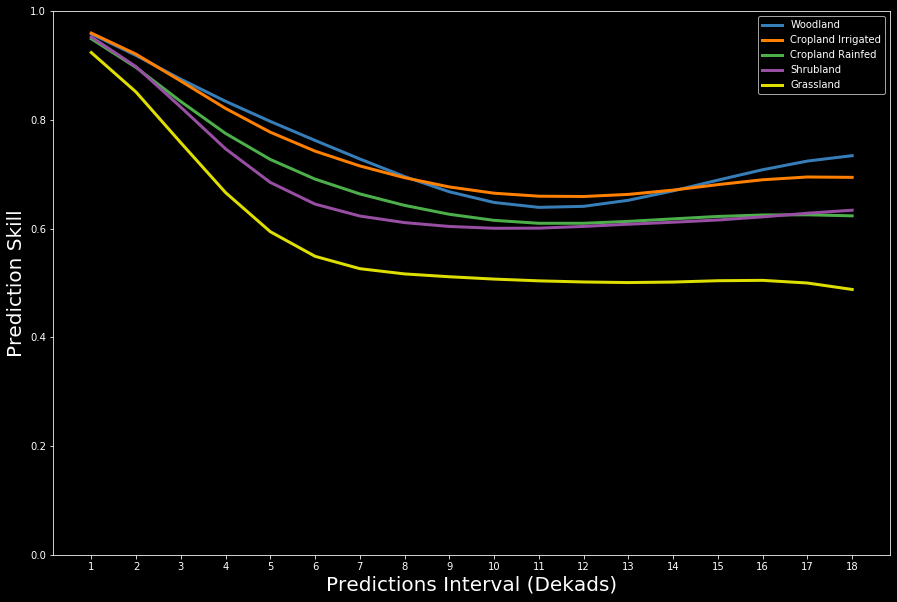

In [33]:
fig = plt.figure(figsize = (15, 10))
plt.plot(psi_anom_df.Prediction_Interval, psi_anom_df.Broadleaf_Open, label = 'Woodland', c = '#377eb8', linewidth = 3)
plt.plot(psi_anom_df.Prediction_Interval, psi_anom_df.Cropland_Irrigated, label = 'Cropland Irrigated', c= '#ff7f00', linewidth = 3)
plt.plot(psi_anom_df.Prediction_Interval, psi_anom_df.Cropland_Rainfed, label = 'Cropland Rainfed', c = '#4daf4a', linewidth = 3)
plt.plot(psi_anom_df.Prediction_Interval, psi_anom_df.Shrubland, label = 'Shrubland', c = '#984ea3', linewidth = 3)
plt.plot(psi_anom_df.Prediction_Interval, psi_anom_df.Grassland, label = 'Grassland', c = '#dede00', linewidth = 3)

plt.xticks(np.arange(1, 19, 1))
plt.ylim([0,1])
plt.xlabel('Predictions Interval (Dekads)', fontsize = 20)
plt.ylabel('Prediction Skill', fontsize = 20)
plt.legend()
# plt.xticks(np.arange(1, 19, 1))
# plt.set_xticklabels(['','',1,'','',2,'','',3,'','',4,'','',5,'','',6], fontsize = 15)
plt.savefig('/home/rgreen/DroughtEDM/Figures/psi_anom.png', dpi = 400)

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xticklabels'

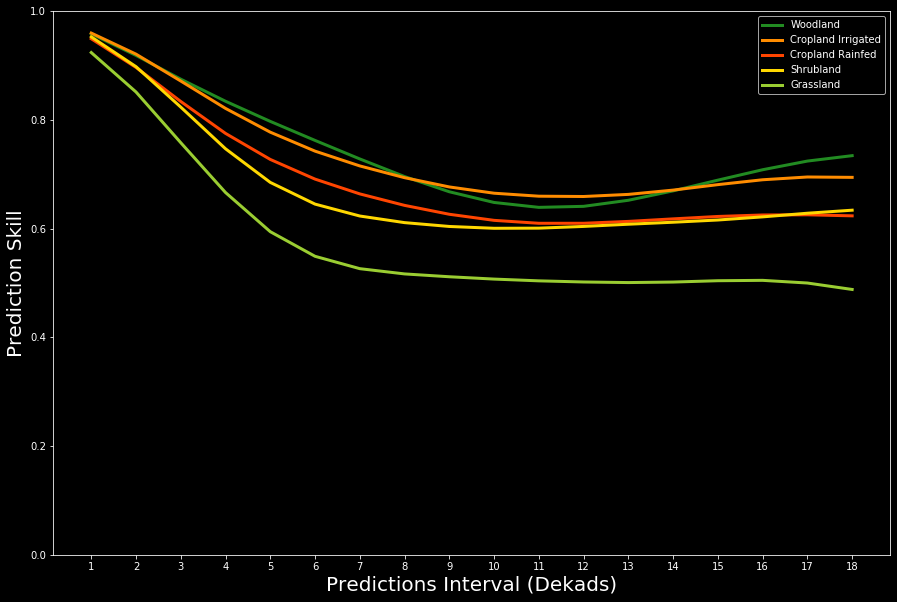

In [21]:
fig = plt.figure(figsize = (15, 10))
plt.plot(psi_anom_df.Prediction_Interval, psi_anom_df.Broadleaf_Open, label = 'Woodland', c = 'forestgreen', linewidth = 3)
plt.plot(psi_anom_df.Prediction_Interval, psi_anom_df.Cropland_Irrigated, label = 'Cropland Irrigated', c= 'darkorange', linewidth = 3)
plt.plot(psi_anom_df.Prediction_Interval, psi_anom_df.Cropland_Rainfed, label = 'Cropland Rainfed', c = 'orangered', linewidth = 3)
plt.plot(psi_anom_df.Prediction_Interval, psi_anom_df.Shrubland, label = 'Shrubland', c = 'gold', linewidth = 3)
plt.plot(psi_anom_df.Prediction_Interval, psi_anom_df.Grassland, label = 'Grassland', c = 'yellowgreen', linewidth = 3)
plt.xticks(np.arange(1, 19, 1))
plt.ylim([0,1])
plt.xlabel('Predictions Interval (Dekads)', fontsize = 20)
plt.ylabel('Prediction Skill', fontsize = 20)
plt.legend()
# plt.xticks(np.arange(1, 19, 1))
# plt.set_xticklabels(['','',1,'','',2,'','',3,'','',4,'','',5,'','',6], fontsize = 15)
plt.savefig('/home/rgreen/DroughtEDM/Figures/psi_anom.png', dpi = 400)

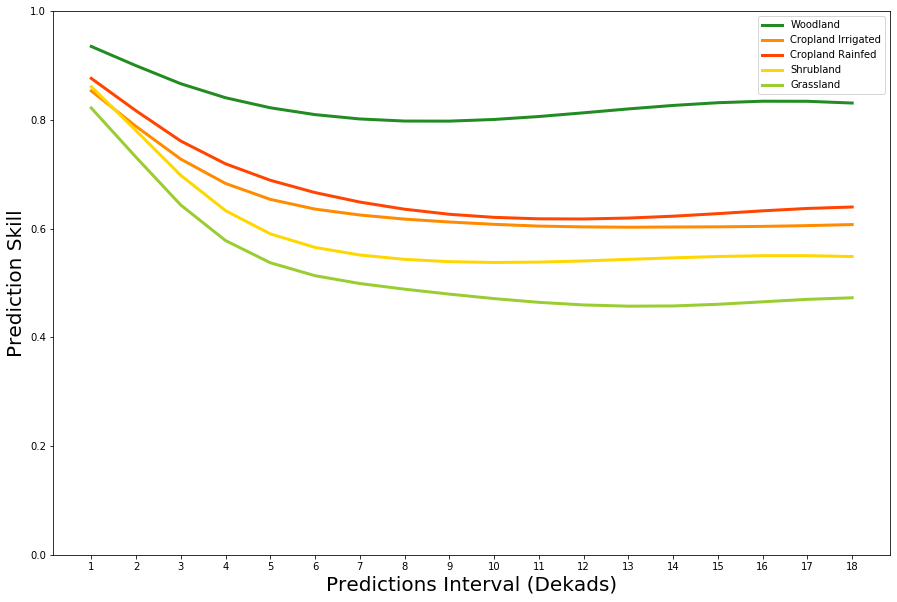

In [51]:
fig = plt.figure(figsize = (15, 10))
plt.plot(psi_ed6_df.Prediction_Interval, psi_ed6_df.Broadleaf_Open, label = 'Woodland', c = 'forestgreen', linewidth = 3)
plt.plot(psi_ed6_df.Prediction_Interval, psi_ed6_df.Cropland_Irrigated, label = 'Cropland Irrigated', c= 'darkorange', linewidth = 3)
plt.plot(psi_ed6_df.Prediction_Interval, psi_ed6_df.Cropland_Rainfed, label = 'Cropland Rainfed', c = 'orangered', linewidth = 3)
plt.plot(psi_ed6_df.Prediction_Interval, psi_ed6_df.Shrubland, label = 'Shrubland', c = 'gold', linewidth = 3)
plt.plot(psi_ed6_df.Prediction_Interval, psi_ed6_df.Grassland, label = 'Grassland', c = 'yellowgreen', linewidth = 3)
plt.xticks(np.arange(1, 19, 1))
plt.ylim([0,1])
plt.xlabel('Predictions Interval (Dekads)', fontsize = 20)
plt.ylabel('Prediction Skill', fontsize = 20)
plt.legend()
plt.savefig('/home/rgreen/DroughtEDM/Figures/psi_ed6.png', dpi = 400)

In [16]:
psed_bo

[0.6156289,
 0.7113799,
 0.7505282,
 0.7759886,
 0.79471004,
 0.809738,
 0.8223686,
 0.8333452,
 0.842758,
 0.8508887]

In [23]:
psed_df = pd.DataFrame({'Embedding_Dimension': list(range(1,11)), 'Broadleaf_Open': psed_bo, 'Cropland_Irrigated': psed_ci, 'Cropland_Rainfed' : psed_cr, 'Grassland': psed_gr, 'Shrubland': psed_sh})


In [24]:
psed_anom_df = pd.DataFrame({'Embedding_Dimension': list(range(1,11)), 'Broadleaf_Open': psed_bo_anom, 'Cropland_Irrigated': psed_ci_anom, 'Cropland_Rainfed' : psed_cr_anom, 'Grassland': psed_gr_anom, 'Shrubland': psed_sh_anom})


In [25]:
psed_anom_hh_df = pd.DataFrame({'Embedding_Dimension': list(range(1,11)), 'Broadleaf_Open': psed_bo_anom_hh, 'Cropland_Irrigated': psed_ci_anom_hh, 'Cropland_Rainfed' : psed_cr_anom_hh, 'Grassland': psed_gr_anom_hh, 'Shrubland': psed_sh_anom_hh})


In [26]:
psed_df

,Embedding_Dimension,Broadleaf_Open,Cropland_Irrigated,Cropland_Rainfed,Grassland,Shrubland
0,1,0.615629,0.485644,0.506318,0.358322,0.376186
1,2,0.711380,0.550903,0.577581,0.413840,0.452224
2,3,0.750528,0.581077,0.610207,0.446162,0.491521
3,4,0.775989,0.604473,0.633592,0.473245,0.521829
4,5,0.794710,0.621561,0.651399,0.495417,0.545525
5,6,0.809738,0.635972,0.666344,0.513425,0.565471
6,7,0.822369,0.648825,0.679173,0.527930,0.582820
7,8,0.833345,0.659413,0.690026,0.540386,0.597864
8,9,0.842758,0.668362,0.699506,0.551151,0.611056
9,10,0.850889,0.676570,0.708005,0.560803,0.623307


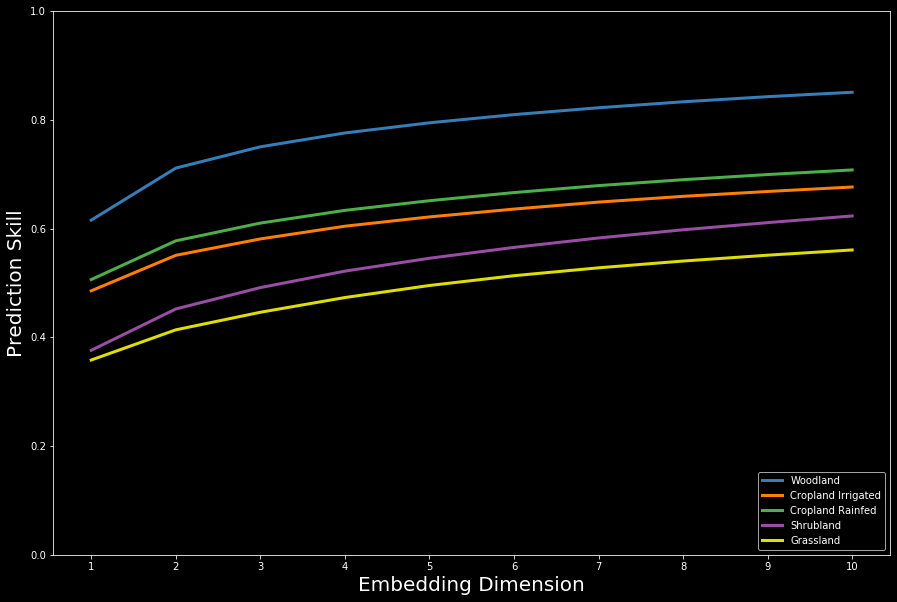

In [34]:
fig = plt.figure(figsize = (15, 10))
plt.plot(psed_df.Embedding_Dimension, psed_df.Broadleaf_Open, label = 'Woodland', c = '#377eb8', linewidth = 3)
plt.plot(psed_df.Embedding_Dimension, psed_df.Cropland_Irrigated, label = 'Cropland Irrigated', c = '#ff7f00', linewidth = 3)
plt.plot(psed_df.Embedding_Dimension, psed_df.Cropland_Rainfed, label = 'Cropland Rainfed', c= '#4daf4a', linewidth = 3)
plt.plot(psed_df.Embedding_Dimension, psed_df.Shrubland, label = 'Shrubland', c = '#984ea3', linewidth = 3)
plt.plot(psed_df.Embedding_Dimension, psed_df.Grassland, label = 'Grassland', c = '#dede00', linewidth = 3)
plt.ylim([0,1])
plt.xticks(np.arange(1, 11, 1))
plt.xlabel('Embedding Dimension', fontsize = 20)
plt.ylabel('Prediction Skill',fontsize = 20)
plt.legend(loc = 4)
plt.savefig('/home/rgreen/DroughtEDM/Figures/psed.png', dpi= 400)

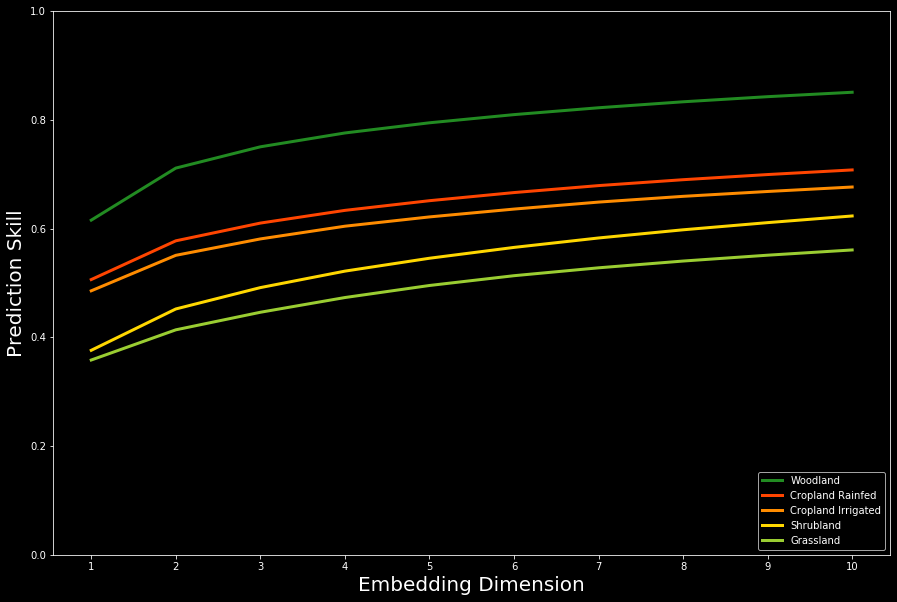

In [27]:
fig = plt.figure(figsize = (15, 10))
plt.plot(psed_df.Embedding_Dimension, psed_df.Broadleaf_Open, label = 'Woodland', c = 'forestgreen', linewidth = 3)
plt.plot(psed_df.Embedding_Dimension, psed_df.Cropland_Rainfed, label = 'Cropland Rainfed', c = 'orangered', linewidth = 3)
plt.plot(psed_df.Embedding_Dimension, psed_df.Cropland_Irrigated, label = 'Cropland Irrigated', c= 'darkorange', linewidth = 3)
plt.plot(psed_df.Embedding_Dimension, psed_df.Shrubland, label = 'Shrubland', c = 'gold', linewidth = 3)
plt.plot(psed_df.Embedding_Dimension, psed_df.Grassland, label = 'Grassland', c = 'yellowgreen', linewidth = 3)
plt.ylim([0,1])
plt.xticks(np.arange(1, 11, 1))
plt.xlabel('Embedding Dimension', fontsize = 20)
plt.ylabel('Prediction Skill',fontsize = 20)
plt.legend(loc = 4)
plt.savefig('/home/rgreen/DroughtEDM/Figures/psed.png', dpi= 400)

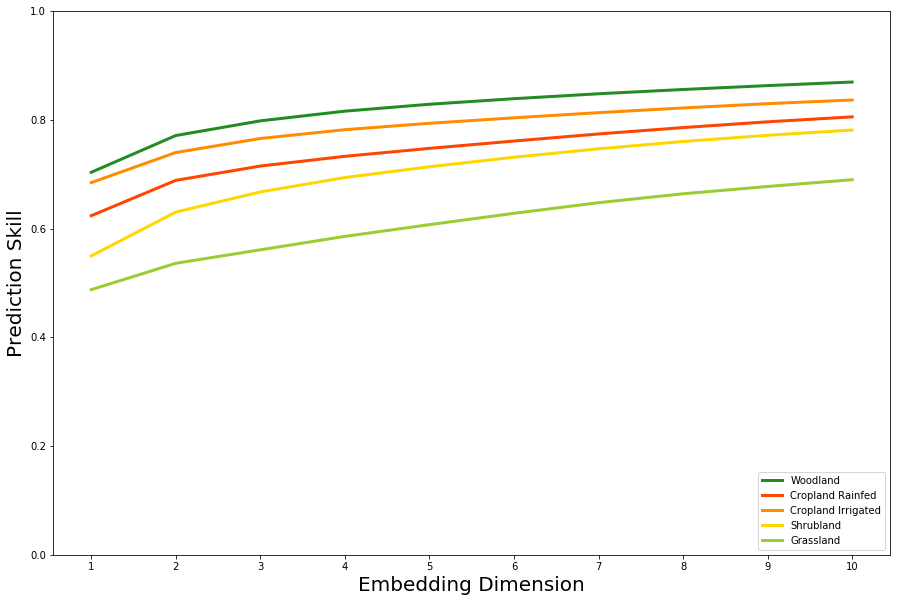

In [62]:
fig = plt.figure(figsize = (15, 10))
plt.plot(psed_anom_df.Embedding_Dimension, psed_anom_df.Broadleaf_Open, label = 'Woodland', c = 'forestgreen', linewidth = 3)
plt.plot(psed_anom_df.Embedding_Dimension, psed_anom_df.Cropland_Rainfed, label = 'Cropland Rainfed', c = 'orangered', linewidth = 3)
plt.plot(psed_anom_df.Embedding_Dimension, psed_anom_df.Cropland_Irrigated, label = 'Cropland Irrigated', c= 'darkorange', linewidth = 3)
plt.plot(psed_anom_df.Embedding_Dimension, psed_anom_df.Shrubland, label = 'Shrubland', c = 'gold', linewidth = 3)
plt.plot(psed_anom_df.Embedding_Dimension, psed_anom_df.Grassland, label = 'Grassland', c = 'yellowgreen', linewidth = 3)
plt.ylim([0,1])
plt.xticks(np.arange(1, 11, 1))
plt.xlabel('Embedding Dimension', fontsize = 20)
plt.ylabel('Prediction Skill',fontsize = 20)
plt.legend(loc = 4)
plt.savefig('/home/rgreen/DroughtEDM/Figures/psed.png', dpi= 400)

Prediction skill vs embedding dimension using half the data to train/test

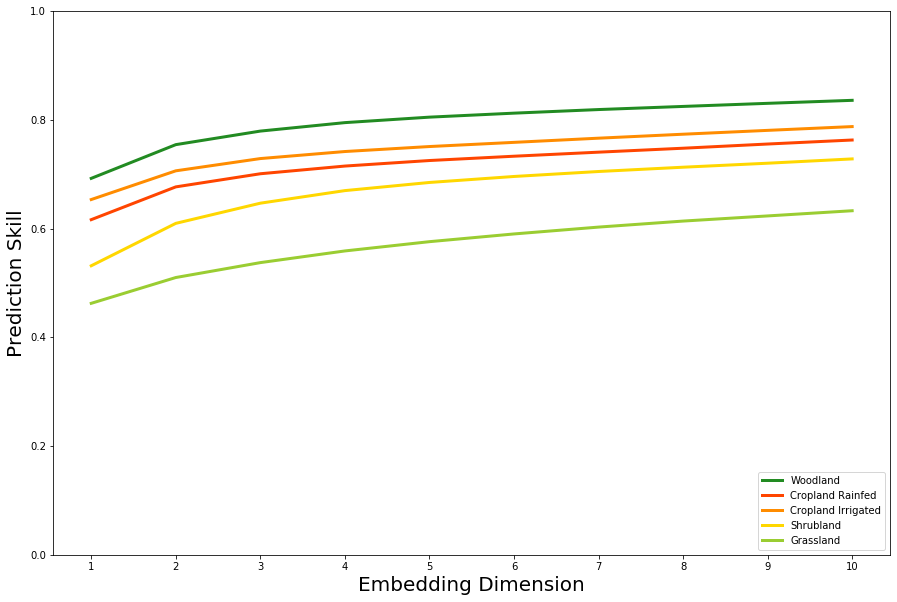

In [72]:
fig = plt.figure(figsize = (15, 10))
plt.plot(psed_anom_hh_df.Embedding_Dimension, psed_anom_hh_df.Broadleaf_Open, label = 'Woodland', c = 'forestgreen', linewidth = 3)
plt.plot(psed_anom_hh_df.Embedding_Dimension, psed_anom_hh_df.Cropland_Rainfed, label = 'Cropland Rainfed', c = 'orangered', linewidth = 3)
plt.plot(psed_anom_hh_df.Embedding_Dimension, psed_anom_hh_df.Cropland_Irrigated, label = 'Cropland Irrigated', c= 'darkorange', linewidth = 3)
plt.plot(psed_anom_hh_df.Embedding_Dimension, psed_anom_hh_df.Shrubland, label = 'Shrubland', c = 'gold', linewidth = 3)
plt.plot(psed_anom_hh_df.Embedding_Dimension, psed_anom_hh_df.Grassland, label = 'Grassland', c = 'yellowgreen', linewidth = 3)
plt.ylim([0,1])
plt.xticks(np.arange(1, 11, 1))
plt.xlabel('Embedding Dimension', fontsize = 20)
plt.ylabel('Prediction Skill',fontsize = 20)
plt.legend(loc = 4)
plt.savefig('/home/rgreen/DroughtEDM/Figures/psed.png', dpi= 400)